from https://www.kaggle.com/dinodelao/fastai-v2-gpu-for-chinese-mnist-prediction

In [1]:
import fastai
from fastai.vision.all import *
from fastai.vision.widgets import *
import pandas as pd
import os

In [2]:
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [3]:
path = Path("../input/chinese-mnist/data/data")

Path.BASE_PATH = path

path.ls()

(#15000) [Path('input_3_9_14.jpg'),Path('input_29_9_14.jpg'),Path('input_86_3_5.jpg'),Path('input_67_10_4.jpg'),Path('input_35_4_4.jpg'),Path('input_58_7_5.jpg'),Path('input_49_4_9.jpg'),Path('input_1_1_12.jpg'),Path('input_86_1_9.jpg'),Path('input_71_3_8.jpg')...]

creating a dataframe

In [4]:
df = pd.read_csv("../input/chinese-mnist/chinese_mnist.csv")
df.head()

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


In [5]:
# We can create a new column in Pandas and use our existing columns to concatenate our file names.

df['fname'] = ("input_" + df['suite_id'].astype(str) 
               + "_" 
               + df['sample_id'].astype(str) 
               + "_" 
               + df['code'].astype(str) 
               + ".jpg")
df.head()

,suite_id,sample_id,code,value,character,fname
0,1,1,10,9,九,input_1_1_10.jpg
1,1,10,10,9,九,input_1_10_10.jpg
2,1,2,10,9,九,input_1_2_10.jpg
3,1,3,10,9,九,input_1_3_10.jpg
4,1,4,10,9,九,input_1_4_10.jpg


drfine functions to get the label items

In [6]:
def get_x(r): return path/r['fname']

#.astype() and .split() method were added to contain each label
def get_y(r): return r['value'].astype(str).split(" ")

In [7]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter = RandomSplitter(seed=42),
                   get_x = get_x,
                   get_y = get_y,
                   item_tfms = RandomResizedCrop(128, min_scale=0.35),
                  )
dls = dblock.dataloaders(df)

In [8]:
len(dls.train), len(dls.valid)

(187, 47)

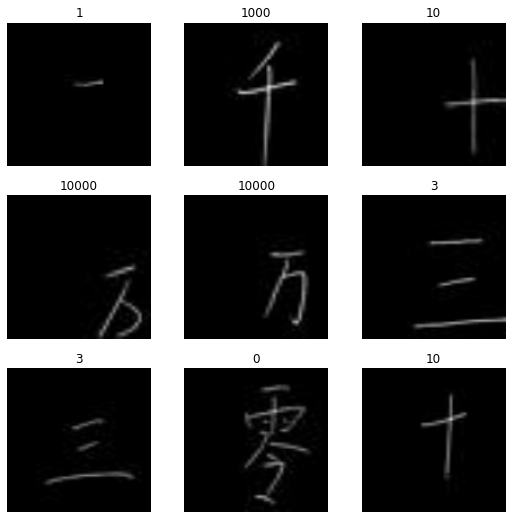

In [9]:
dls.show_batch()

In [10]:
dls.train_ds

(#12000) [(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0.

In [11]:
dls.valid_ds

(#3000) [(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0.,

In [12]:
learn = cnn_learner(dls, resnet18, metrics=partial(accuracy_multi,thresh=0.2))
learn.fine_tune(6)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.397430,0.113739,0.954067,01:30


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.080289,0.021470,0.991533,00:43
1,0.026730,0.005263,0.998000,00:43
2,0.013686,0.003240,0.998734,00:43
3,0.010643,0.002577,0.999178,00:43
4,0.007489,0.001917,0.999422,00:43
5,0.007478,0.001756,0.999533,00:43


,target,predicted,probabilities,loss
0,10,1000,"tensor([8.1106e-05, 7.8694e-05, 3.2692e-04, 1.7101e-04, 9.9944e-01, 8.6522e-05,\n 5.9128e-05, 9.6533e-05, 8.1043e-04, 4.3110e-05, 6.4345e-05, 3.5428e-04,\n 7.6127e-05, 6.4976e-05, 5.1397e-05])",1.0341458320617676
1,2,1,"tensor([2.8945e-05, 9.9810e-01, 6.7065e-05, 5.8114e-05, 1.3061e-04, 1.2894e-04,\n 8.8354e-05, 1.3946e-03, 1.6166e-04, 6.0405e-05, 4.2774e-05, 2.7549e-05,\n 4.9267e-05, 4.8016e-05, 4.8599e-05])",0.8561310172080994
2,8,6,"tensor([1.2812e-04, 1.4284e-04, 2.8565e-04, 7.9569e-05, 6.4390e-05, 1.5719e-04,\n 6.1507e-04, 1.3164e-04, 3.4928e-04, 9.6492e-05, 1.3689e-04, 9.9497e-01,\n 2.6857e-04, 7.3875e-04, 1.8103e-03])",0.8338059186935425
3,6,10000,"tensor([1.8180e-05, 1.1154e-04, 8.0113e-05, 3.8603e-05, 1.7539e-05, 9.7375e-01,\n 2.1441e-05, 3.9376e-05, 1.9777e-05, 2.3362e-05, 2.7200e-05, 2.7133e-02,\n 4.7591e-06, 6.0435e-06, 2.7577e-05])",0.48316314816474915
4,10,,"tensor([5.9698e-05, 1.4097e-03, 1.3727e-01, 5.4591e-05, 7.8642e-02, 3.4082e-01,\n 9.1169e-05, 3.2527e-04, 3.5436e-04, 7.5928e-05, 6.8151e-04, 9.9852e-05,\n 5.9803e-04, 3.6663e-04, 5.1482e-05])",0.16590942442417145


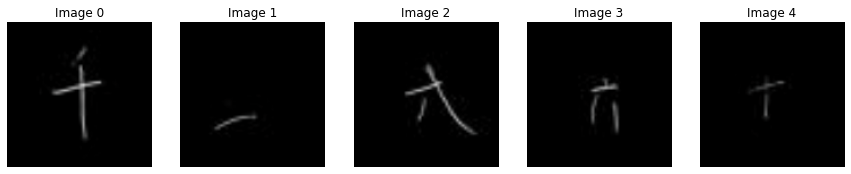

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(5, nrows=1)


In [14]:
interp.most_confused(5)

[('1', '0', 10), ('0', '1', 6)]

SuggestedLRs(lr_min=0.04365158379077912, lr_steep=0.033113110810518265)

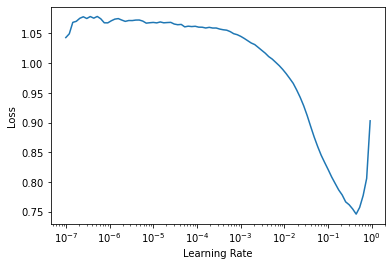

In [15]:
learn = cnn_learner(dls, resnet18, metrics=partial(accuracy_multi, thresh=0.2))
learn.lr_find()

In [16]:
learn = cnn_learner(dls, resnet18, metrics=partial(accuracy_multi, thresh=0.2))
learn.fine_tune(6, base_lr=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.168604,0.047647,0.977889,00:41


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.023254,0.009711,0.995978,00:42
1,0.021917,0.005484,0.997511,00:43
2,0.013897,0.003301,0.998911,00:42
3,0.008502,0.002269,0.999400,00:43
4,0.005728,0.001892,0.999689,00:43
5,0.003613,0.001648,0.999756,00:42


In [20]:
learn.unfreeze()

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.033113110810518265)

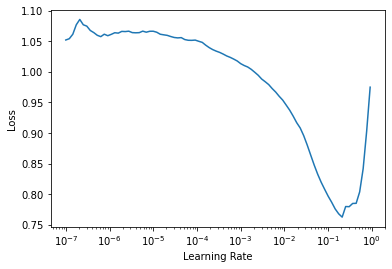

In [21]:
learn.lr_find()

In [22]:
learn.fit_one_cycle(6, 1e-4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.904222,0.682897,0.124200,00:42
1,0.644622,0.408919,0.248378,00:42
2,0.441312,0.229137,0.542067,00:42
3,0.337583,0.167186,0.803711,00:43
4,0.296362,0.148966,0.891444,00:42
5,0.287458,0.146782,0.908422,00:42


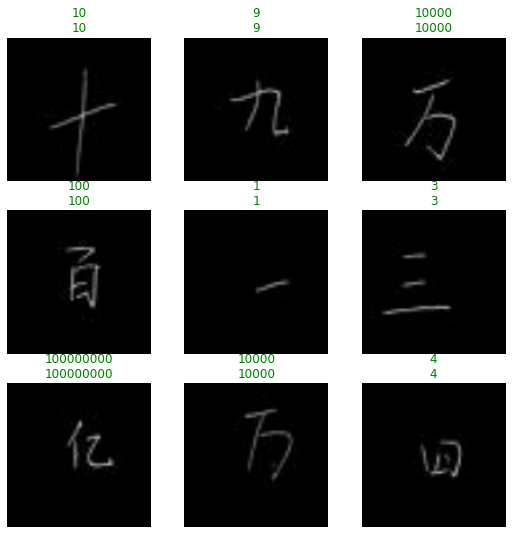

In [23]:
learn.show_results()